Diabetes Risk Prediction using dataset from UCI repository link below
https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

diabetes = pd.read_csv('diabetes_data_upload.csv')

#quick visual inspection
diabetes.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


Checking for null values, looks good

In [2]:
diabetes.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

Distribution of Positive vs Negative class values

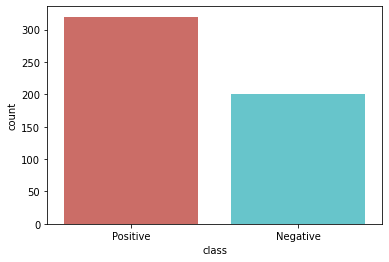

In [4]:
sns.countplot(x='class', data=diabetes, palette='hls')
plt.show()

Changing Gender values to numeric

In [5]:
gender_num = {'Male' : 1, 'Female' : 0}
diabetes['Gender'] = diabetes['Gender'].map(gender_num)
diabetes.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,1,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,1,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,1,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,1,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,1,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,1,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,1,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,1,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,1,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


Quickly see number of males vs females

In [6]:
diabetes.groupby(diabetes['Gender'])['class'].count()

Gender
0    192
1    328
Name: class, dtype: int64

Time to change Yes/No values in feature columns to 1 or 0 numeric

In [7]:
yes_no_map = {'Yes' : 1, 'No' : 0}
for i in diabetes.columns[2:len(diabetes.columns)-1]:
    diabetes[i] = diabetes[i].map(yes_no_map)
diabetes.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,Positive
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Positive
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,Positive
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,Positive
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,Positive
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,Positive
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,Positive
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,Positive
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,Positive
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,Positive


One more time for class, our dependent variable

In [8]:
pos_neg_map = {'Positive' : 1, 'Negative' : 0}
diabetes['class'] = diabetes['class'].map(pos_neg_map)
diabetes.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


Let's separate feature values from label value

In [9]:
from sklearn.model_selection import train_test_split

#splitting into features and label
features = diabetes.drop('class', axis=1)
label = diabetes['class']

#splitting into training, test, and validation sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

Checking train test validate proportions

In [11]:
print(len(X_train)/len(features))
print(len(X_test)/len(features))
print(len(X_val)/len(features))

0.8
0.1
0.1


Time to build the model. Hooray!!

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(max_iter=1000)
parameters = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}  #using varying degrees of regularization
cv = GridSearchCV(lr, parameters, cv=5)  #5-fold cross validation
cv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

Using 5-fold cross validation and varying degrees of regularization to find optimal fit

In [13]:
print("Best Params: {}\n".format(cv.best_params_))
means = cv.cv_results_['mean_test_score']
stdevs = cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stdevs, cv.cv_results_['params']):
    print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

Best Params: {'C': 1}

0.608 (+/-0.043) for {'C': 0.001}
0.82 (+/-0.072) for {'C': 0.01}
0.911 (+/-0.039) for {'C': 0.1}
0.916 (+/-0.034) for {'C': 1}
0.911 (+/-0.019) for {'C': 10}
0.911 (+/-0.033) for {'C': 100}
0.911 (+/-0.033) for {'C': 1000}


Give us best estimator, can be seen as C=1 above

In [14]:
cv.best_estimator_

LogisticRegression(C=1, max_iter=1000)

How does it perform? Let's make predictions and check accuracy/precision/recall

In [15]:
#getting performance metrics
#accuracy = TP + TN / TP + TN + FP + FN
#precision = TP / TP + FP
#recall = TP / TP + FN
from sklearn.metrics import accuracy_score, precision_score, recall_score
lr_final = LogisticRegression(C=1, max_iter=1000)
lr_final.fit(X_train, y_train)
y_pred = lr_final.predict(X_test)
acc = round(accuracy_score(y_test, y_pred), 3)
prec = round(precision_score(y_test, y_pred), 3)
rec = round(recall_score(y_test, y_pred), 3)
print(f"Accuracy: {acc}")
print(f"Precision: {prec}")
print(f"Recall: {rec}")

Accuracy: 0.942
Precision: 0.971
Recall: 0.943


The model is performing well in all 3 metrics.